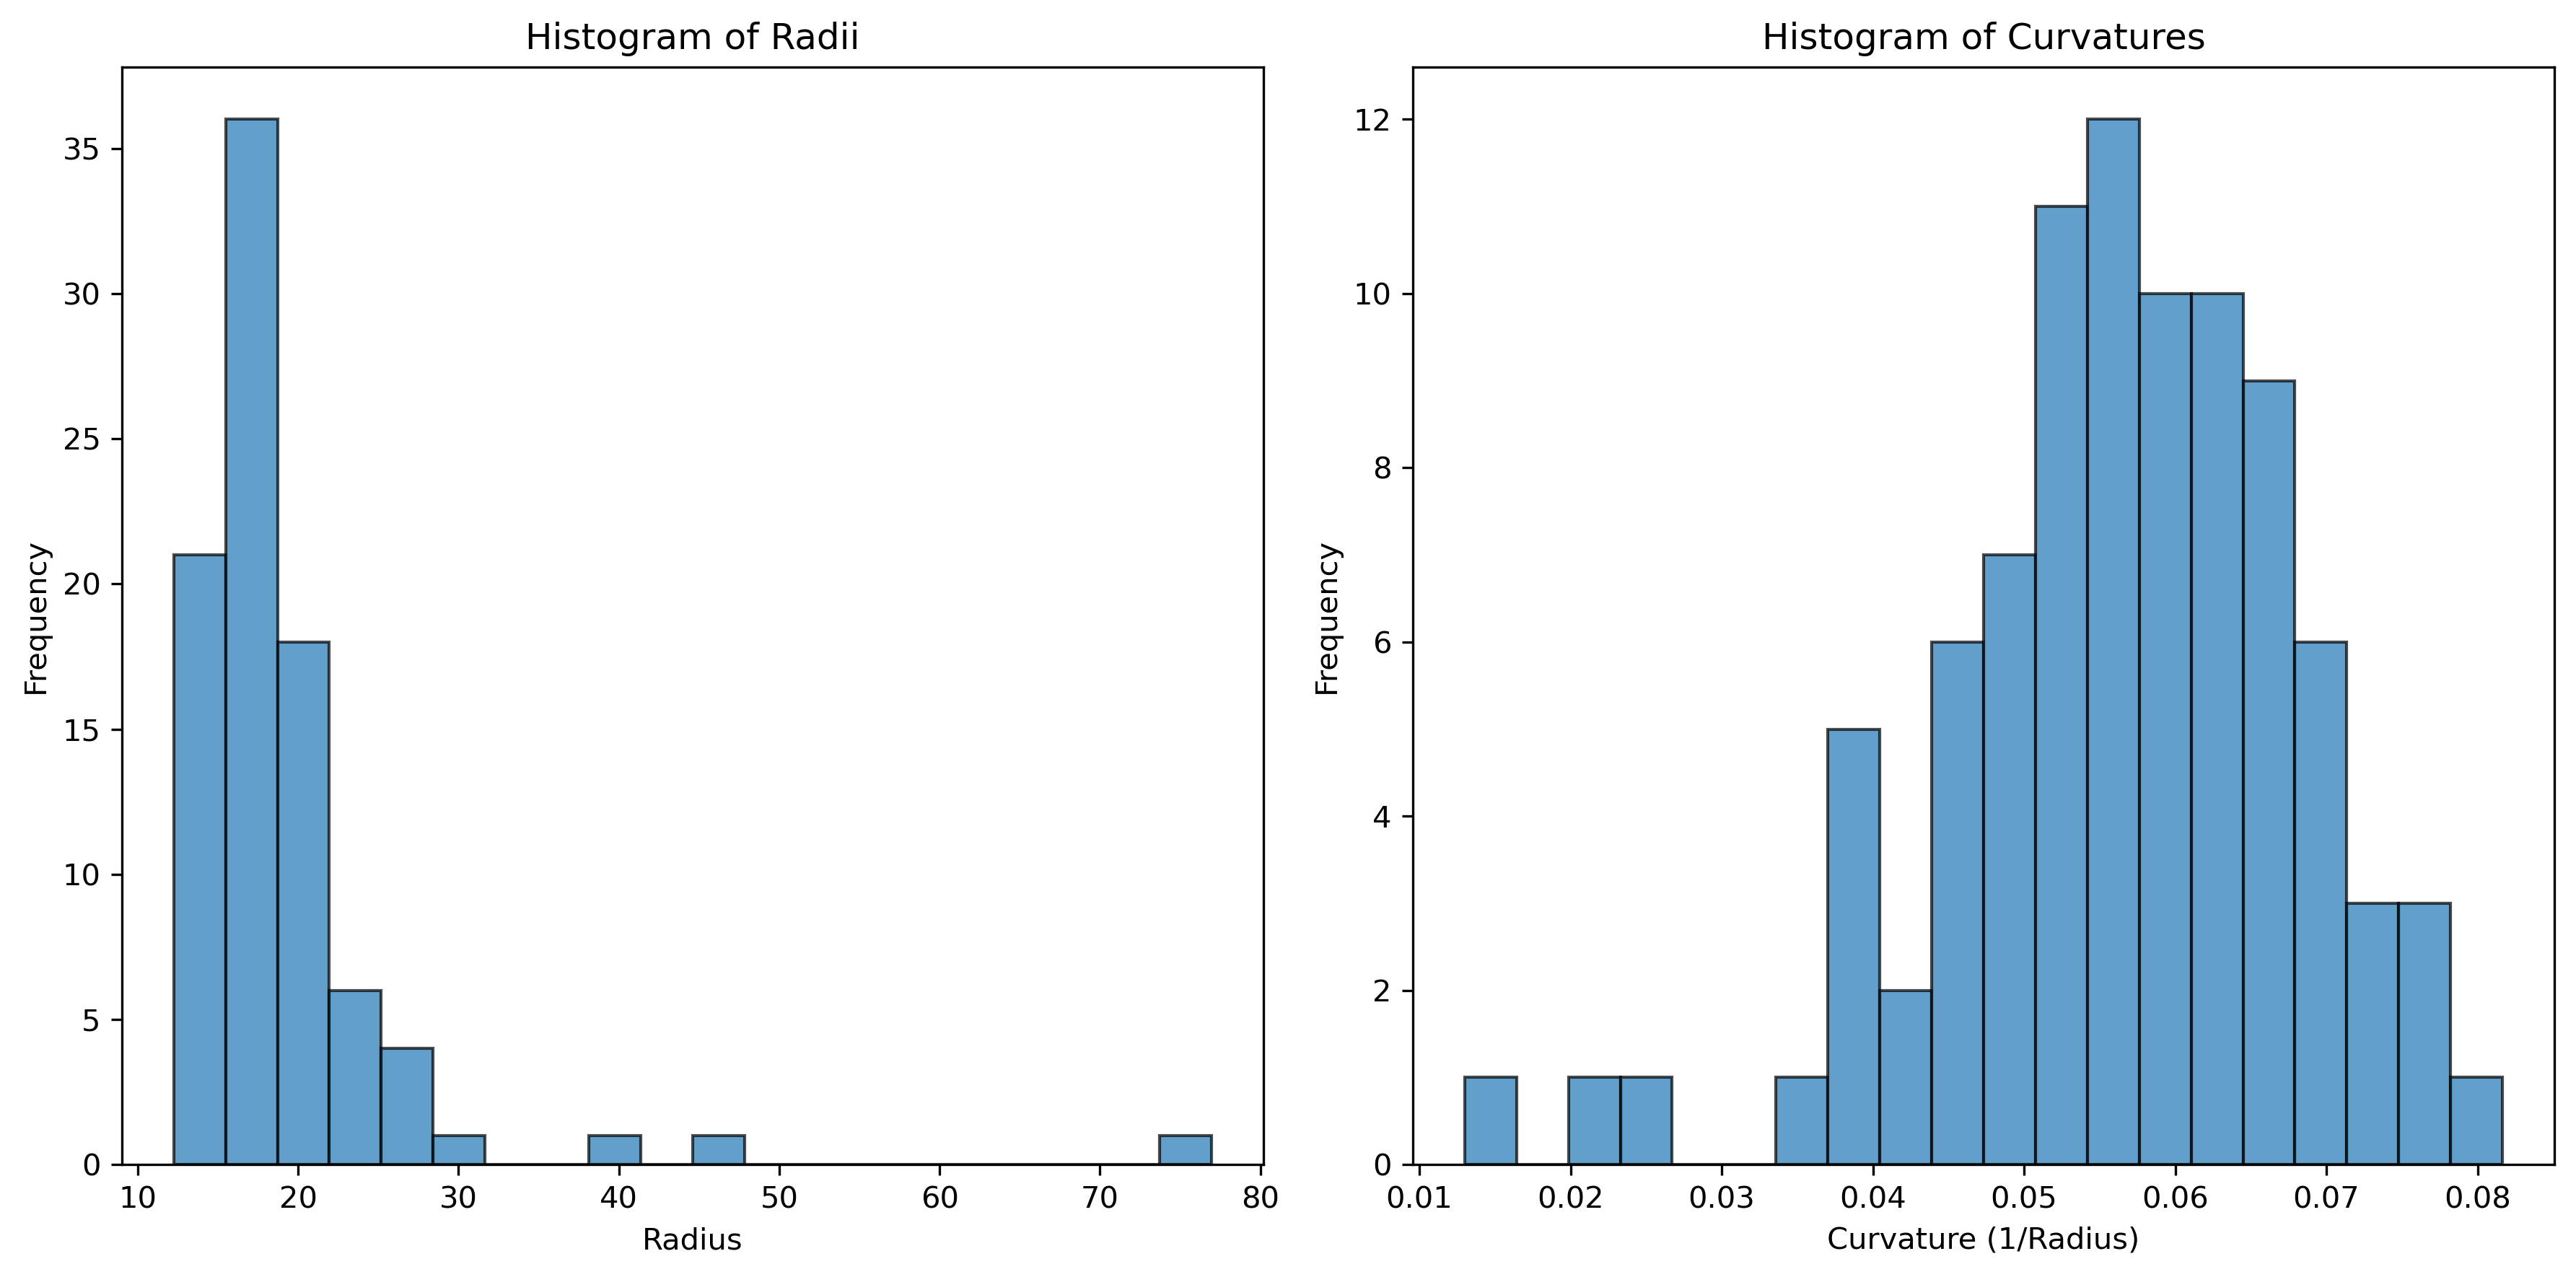

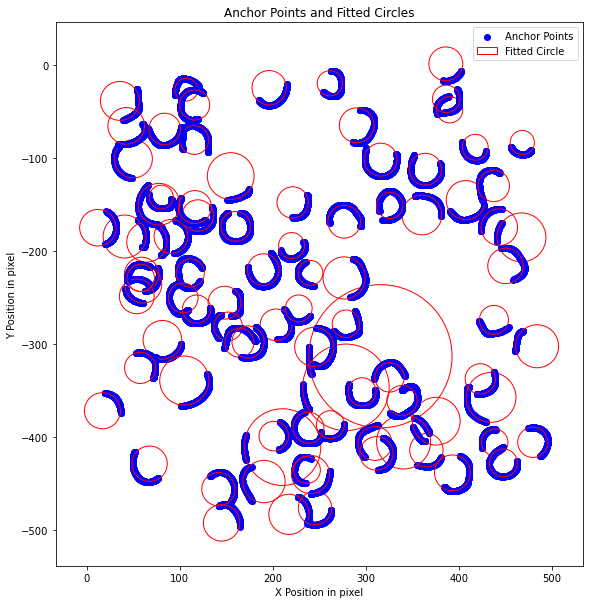

In [19]:
import pandas as pd
import re
from collections import defaultdict
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# Load the file
## "segposition.txt" text files containing the coordinate position of the anchor points extracted from illustrator by java script.
file_path = "segposition.txt" 
data = pd.read_csv(file_path, header=None)

# Display the first few rows to understand its structure
data.head()


# Initialize a dictionary to hold the path-wise anchor points
paths = defaultdict(list)

# Extract path and anchor point information
for index, row in data.iterrows():
    match = re.match(r"(seg_\d+)", row[0])
    if match:
        path = match.group(1)
        x, y = row[1], row[2]
        paths[path].append((x, y))

# Convert the dictionary to a list of paths with their points
path_points = {path: points for path, points in paths.items()}

# Display the separated paths and their points
path_points_list = [(path, len(points)) for path, points in path_points.items()]
path_points_list[:10]  # Display first 10 paths with the number of points in each path

import numpy as np
from scipy.optimize import leastsq

# Function to calculate the distance from a point to the circle center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to compute algebraic distance between data points and the mean circle centered at c=(xc, yc)
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to fit a circle to the given points
def fit_circle(x, y):
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center, _ = leastsq(f_2, center_estimate, args=(x, y))
    xc, yc = center
    Ri = calc_R(xc, yc, np.array(x), np.array(y))
    R = Ri.mean()
    return xc, yc, R

# List to store the radii of the circles
radii = []

# Dictionary to store circle parameters for each path
circles = {}

# Fit circles and compute radii
for path, points in path_points.items():
    if len(points) < 3:  # Need at least 3 points to fit a circle
        continue
    x, y = zip(*points)
    xc, yc, radius = fit_circle(x, y)
    radii.append(radius)
    circles[path] = (xc, yc, radius)

# Display the radii of the first 10 fitted circles
radii[:10]

import matplotlib.pyplot as plt

# Compute curvature (1/radius)
curvatures = [1/r for r in radii]

# Plot histogram of radii and curvatures
plt.figure(figsize=(12, 6),dpi=300)

# Histogram for Radii
plt.subplot(1, 2, 1)
plt.hist(radii, bins=20, alpha=0.7, edgecolor='black')
plt.title('Histogram of Radii')
plt.xlabel('Radius')
plt.ylabel('Frequency')

# Histogram for Curvatures
plt.subplot(1, 2, 2)
plt.hist(curvatures, bins=20, alpha=0.7, edgecolor='black')
plt.title('Histogram of Curvatures')
plt.xlabel('Curvature (1/Radius)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
# Plotting the paths and fitted circles
plt.figure(figsize=(10, 10))

# Colors for plotting
path_color = 'blue'
circle_color = 'red'

for path, points in path_points.items():
    if path not in circles:
        continue
    x, y = zip(*points)
    
    # Plot original anchor points
    plt.scatter(x, y, color=path_color, label='Anchor Points' if path == list(circles.keys())[0] else "")

    # Plot fitted circle
    xc, yc, R = circles[path]
    circle = plt.Circle((xc, yc), R, color=circle_color, fill=False, label='Fitted Circle' if path == list(circles.keys())[0] else "")
    plt.gca().add_patch(circle)


#plt.gca().invert_yaxis()

# Plot settings
plt.title('Anchor Points and Fitted Circles')
plt.xlabel('X Position in pixel')
plt.ylabel('Y Position in pixel')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()
